In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Aim: To build the Time Series model which forecast the no. of passengers traveling in an airline and check its accuracy.

In [2]:
os.chdir('E:\SkillEnable Class\Python\Datasets')

In [3]:
df = pd.read_csv('Air Passengers Exam.csv', parse_dates=['Month'])

In [4]:
df

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [5]:
df = df.set_index('Month')

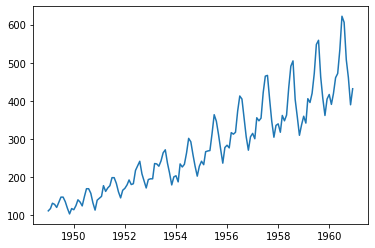

In [6]:
plt.plot(df)

In [7]:
# rolling window

rollmean = df.rolling(window=12).mean()

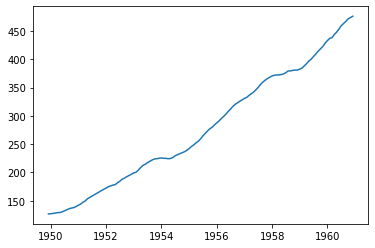

In [8]:
plt.plot(rollmean)

In [9]:
# Checking the given data is weather stationary or not using KPSS test

from statsmodels.tsa.stattools import kpss

In [10]:
#significance value(alpha) = 0.05
#null hypothesis - The given model is a non - stationary series. (If p-value < 0.05)
#alternate hypothesis - The given model is a stationary time series. (If p-value > 0.05)

In [11]:
result = kpss(df)
result

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


(1.0521750110135095,
 0.01,
 14,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [12]:
df['1 order of differencing'] = df-df.shift()

In [13]:
df = df.dropna()

In [14]:
result1 = kpss(df['1 order of differencing'])

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [15]:
result1

(0.05300976189850532,
 0.1,
 14,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

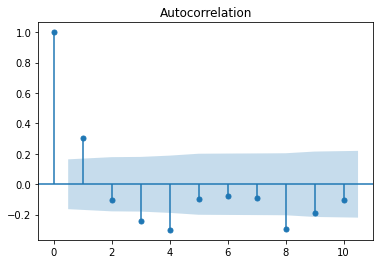

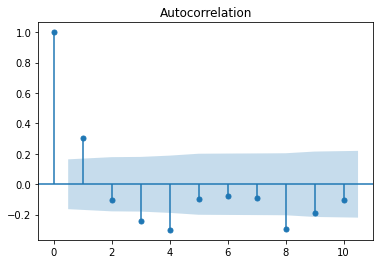

In [16]:
#Plot ACF chart

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['1 order of differencing'], lags=10)

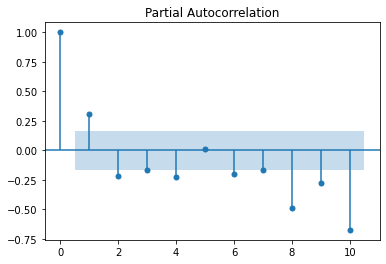

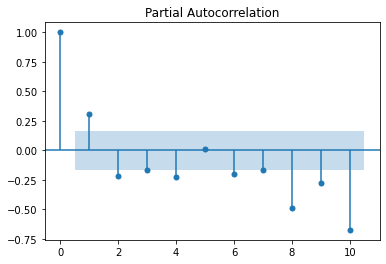

In [17]:
# plot pacf

plot_pacf(df['1 order of differencing'], lags=10)

In [18]:
# spliting into train and test data

train = df[['#Passengers']][:110]
test = df[['#Passengers']][110:]

In [19]:
len(train), len(test)

(110, 33)

In [20]:
train

,#Passengers
Month,
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
...,...
1957-11-01,305
1957-12-01,336
1958-01-01,340


In [21]:
#Build ARIMA model

#Since Auto-Corelation value at lag 1 is positive and significant, we use Auto Regressive model

from statsmodels.tsa.arima_model import ARIMA

model_AR=ARIMA(train, order=(1,1,0))

summary_model= model_AR.fit(disp = False)
summary_model.summary()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  109
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -505.847
Method:                       css-mle   S.D. of innovations             25.067
Date:                Mon, 28 Feb 2022   AIC                           1017.693
Time:                        21:13:32   BIC                           1025.767
Sample:                    03-01-1949   HQIC                          1020.968
                         - 03-01-1958                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.4069      3.220      0.747      0.455      -3.905       8.719
ar.L1.D.#Passengers     0.2566      0.093      2.749      0.006       0.074       0.439
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.8977           +0.0000j            3.8977            0.0000
-----------------------------------------------------------------------------
"""

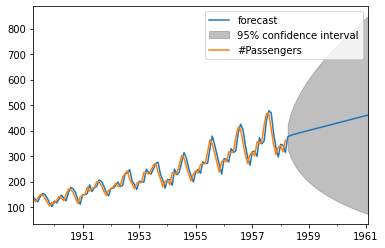

In [22]:
forecast = summary_model.plot_predict(2, 144)

In [23]:
test['Predection'] = summary_model.predict(110, 145, typ='levels')

In [24]:
test

,#Passengers,Predection
Month,,
1958-04-01,348,375.078048
1958-05-01,363,380.222746
1958-06-01,435,383.332061
1958-07-01,491,385.919177
1958-08-01,505,388.372317
1958-09-01,404,390.791084
1958-10-01,359,393.201033
1958-11-01,310,395.608719
1958-12-01,337,398.015825


In [25]:
def get_mape(actual, predicted):
    y_true, y_pred = np.array(actual), np.array(predicted)
    return np.round(np.mean(np.abs((actual - predicted) / actual)) * 100, 2)

In [26]:
get_mape(test['#Passengers'], test['Predection'])

12.04

### The mean average percentage error is 12.04